# Keras Regression Deep Learning Project 

Application of Deep Learning Knockledge in realistic data set. The project will also focus on feature engineering and cleaning dataset!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [62]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [64]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [65]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


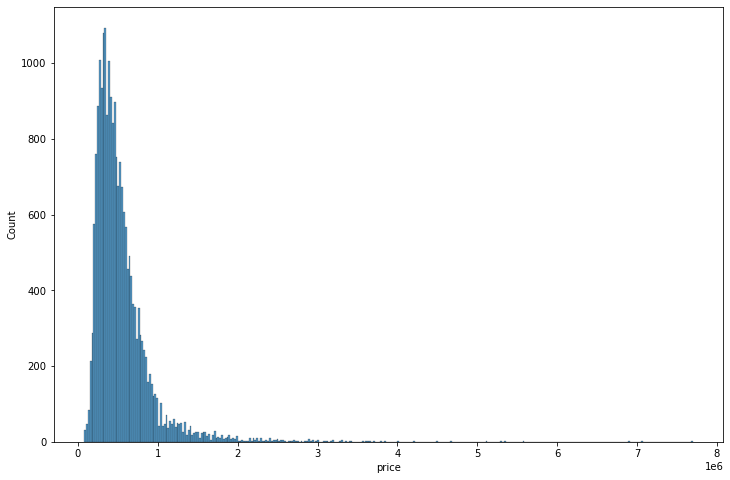

In [66]:
plt.figure(figsize=(12,8))
sns.histplot(df['price'])

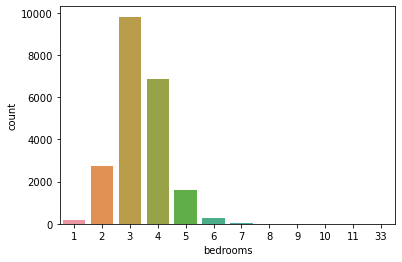

In [67]:
sns.countplot(data= df, x=df['bedrooms'] )

**Finding correlation between prices and others features in dataset** 

In [68]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

**Exploring highly correlated features with price**

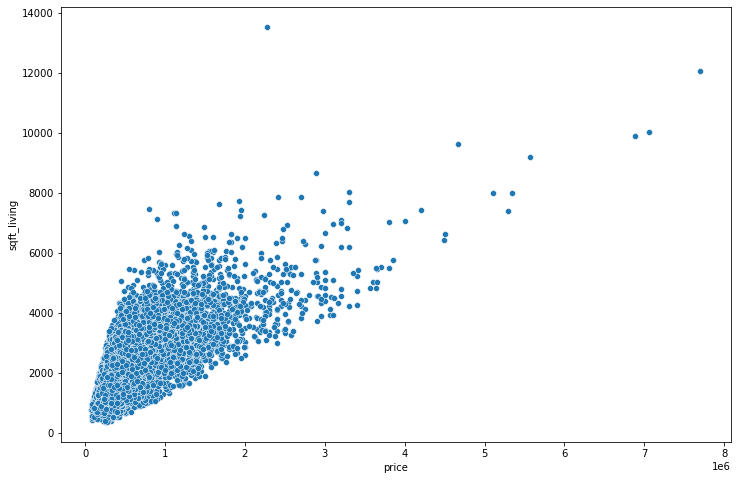

In [69]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

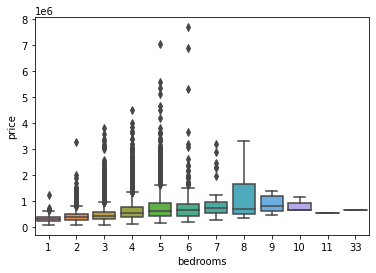

In [70]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

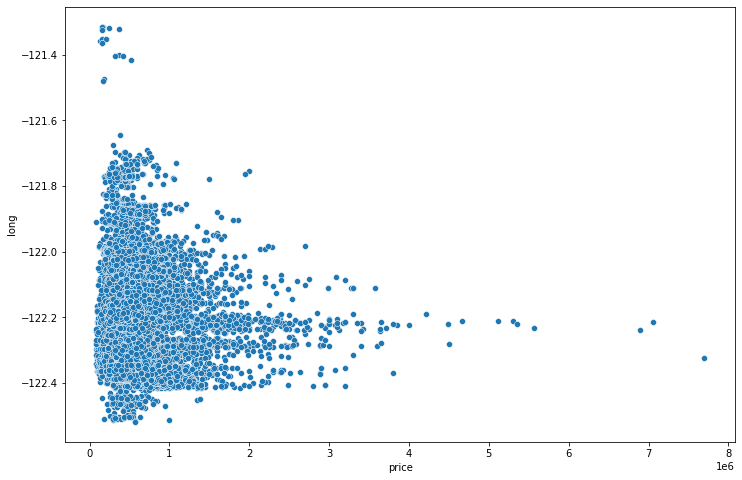

In [71]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

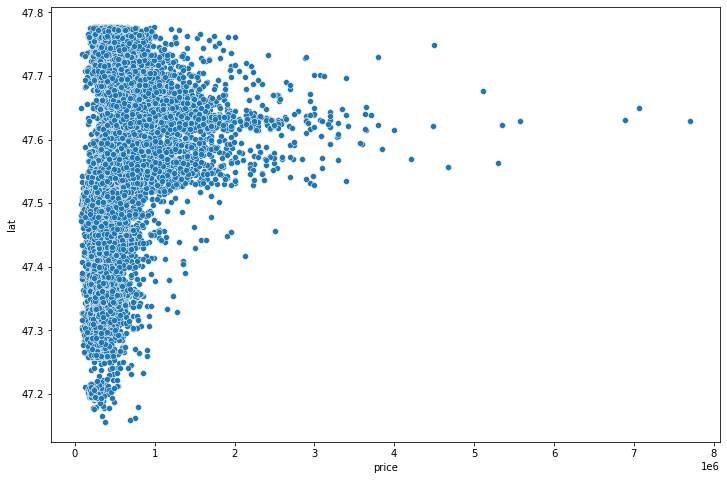

In [72]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

*From plots above, a combination of longitude and latitude give a highly expensive housing area!* 

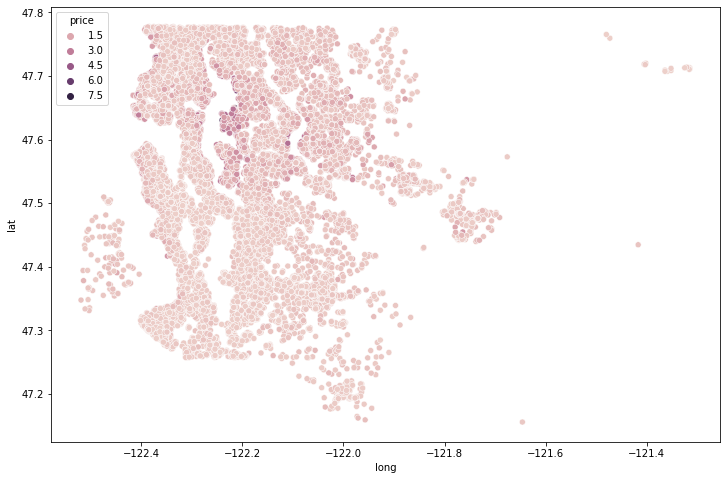

In [73]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

**Sorting out the 20 most expensive houses**

In [74]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


**Dropping out 1% of most expensive houses constituting outliers of our dataset for a more realistic prediction** 

In [75]:
len(df)*(0.01)

215.97

In [76]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

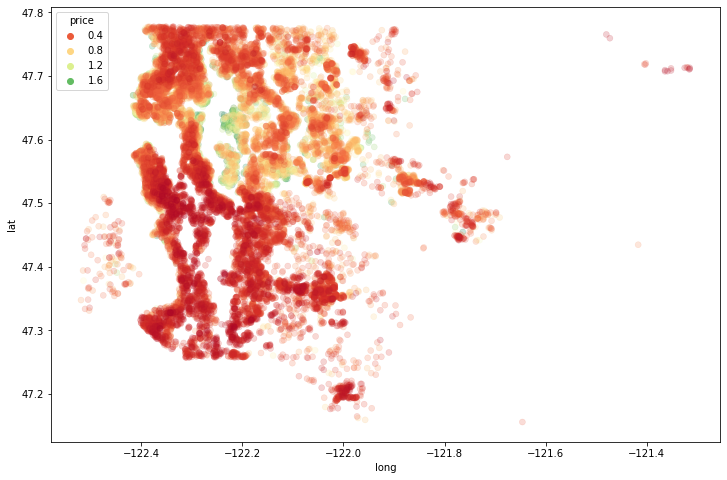

In [77]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price', palette='RdYlGn',edgecolor=None,alpha=0.2)

**Visualizing insight behind waterfront properties vs price**

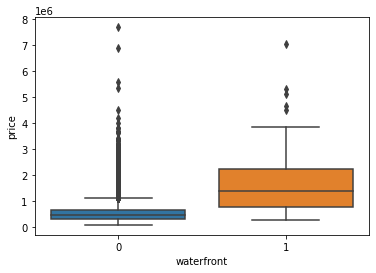

In [78]:
sns.boxplot(x='waterfront',y='price',data=df)

## Feature Engieering

In [79]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
df = df.drop('id',axis=1)

In [81]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

**Transforming Date to datetime object**

In [83]:
df['date'] = pd.to_datetime(df['date'])

**Creating month and year columns**

In [84]:
df['month'] = df['date'].apply(lambda date:date.month)

In [85]:
df['year'] = df['date'].apply(lambda date:date.year)

In [86]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


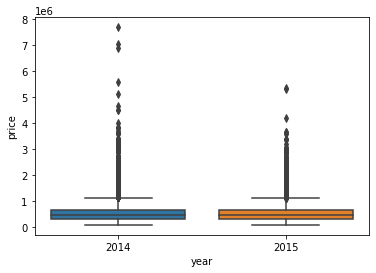

In [87]:
sns.boxplot(x='year',y='price',data=df)

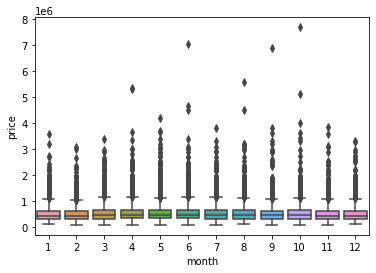

In [88]:
sns.boxplot(x='month',y='price',data=df)

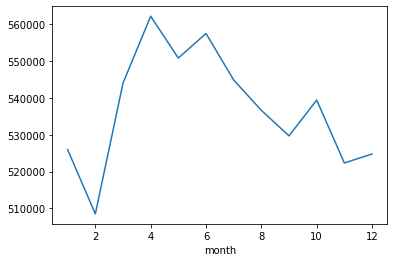

In [89]:
df.groupby('month').mean()['price'].plot()

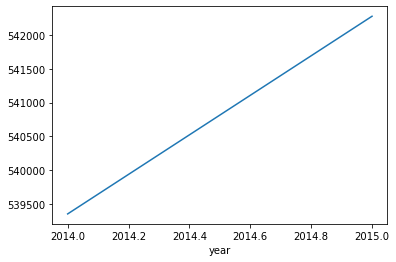

In [90]:
df.groupby('year').mean()['price'].plot()

In [91]:
df = df.drop('date',axis=1)

**Feature engineering zipcode column**

In [92]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [93]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

**Dropping zipcode column since there are a lot of unique values**

In [94]:
df = df.drop('zipcode',axis=1)

**Feature engineering yr_renovated column**

In [95]:
# could make sense due to scaling, higher should correlate to more value
# can be categorized on renovated if there is a year or not renovated if year is 0
# Keeping it as continous 
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

**Feature engineering sqft_basement column**

In [98]:
# 0 means there is no basement 
# Since there is a variation between houses with basement and without basement, feature ca nbe kept as continous 
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [99]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler = MinMaxScaler()

In [104]:
X_train= scaler.fit_transform(X_train)

In [105]:
X_test = scaler.transform(X_test)

In [106]:
X_train.shape

(15117, 19)

In [107]:
X_test.shape

(6480, 19)

## Creating a Model

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [109]:
# since we have 19 features it is better to have equel amount of neurons in layers
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [111]:
#test data in .fit() will not affect the weights and biases of our data
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 424299713331.2000 - val_loss: 418944483328.0000
Epoch 2/400
119/119 [==============================] - 0s 978us/step - loss: 410084114978.1334 - val_loss: 417171800064.0000
Epoch 3/400
119/119 [==============================] - 0s 965us/step - loss: 424433147357.8666 - val_loss: 401256873984.0000
Epoch 4/400
119/119 [==============================] - 0s 928us/step - loss: 386423152640.0000 - val_loss: 337481596928.0000
Epoch 5/400
119/119 [==============================] - 0s 921us/step - loss: 320170675950.9333 - val_loss: 209397383168.0000
Epoch 6/400
119/119 [==============================] - 0s 918us/step - loss: 181043047355.7333 - val_loss: 109909336064.0000
Epoch 7/400
119/119 [==============================] - 0s 921us/step - loss: 106426311816.5333 - val_loss: 95158050816.0000
Epoch 8/400
119/119 [==============================] - 0s 938us/step - loss: 99564409787.7333 - val_loss: 93802323968.0000
Epoch

119/119 [==============================] - 0s 923us/step - loss: 39968922402.1333 - val_loss: 39397675008.0000
Epoch 68/400
119/119 [==============================] - 0s 913us/step - loss: 41114190182.4000 - val_loss: 39100424192.0000
Epoch 69/400
119/119 [==============================] - 0s 924us/step - loss: 40776094549.3333 - val_loss: 38826790912.0000
Epoch 70/400
119/119 [==============================] - 0s 916us/step - loss: 43191174109.8667 - val_loss: 38667231232.0000
Epoch 71/400
119/119 [==============================] - 0s 958us/step - loss: 37306655249.0667 - val_loss: 38375309312.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 38913496593.0667 - val_loss: 38139371520.0000
Epoch 73/400
119/119 [==============================] - 0s 995us/step - loss: 39317989614.9333 - val_loss: 37872820224.0000
Epoch 74/400
119/119 [==============================] - 0s 895us/step - loss: 38411609036.8000 - val_loss: 37657767936.0000
Epoch 75/400
119/119 [=

119/119 [==============================] - 0s 908us/step - loss: 34341930325.3333 - val_loss: 32131569664.0000
Epoch 134/400
119/119 [==============================] - 0s 905us/step - loss: 34283304755.2000 - val_loss: 32095453184.0000
Epoch 135/400
119/119 [==============================] - 0s 917us/step - loss: 33308886920.5333 - val_loss: 32033017856.0000
Epoch 136/400
119/119 [==============================] - 0s 903us/step - loss: 32380874137.6000 - val_loss: 32037056512.0000
Epoch 137/400
119/119 [==============================] - 0s 931us/step - loss: 34430939067.7333 - val_loss: 31985741824.0000
Epoch 138/400
119/119 [==============================] - 0s 917us/step - loss: 33723278813.8667 - val_loss: 31913314304.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 33874452172.8000 - val_loss: 31868555264.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 32679135249.0667 - val_loss: 31828674560.0000
Epoch 141/400
119/

Epoch 199/400
119/119 [==============================] - 0s 1ms/step - loss: 31980759586.1333 - val_loss: 30074611712.0000
Epoch 200/400
119/119 [==============================] - 0s 1ms/step - loss: 32780694425.6000 - val_loss: 30039969792.0000
Epoch 201/400
119/119 [==============================] - 0s 901us/step - loss: 30721710011.7333 - val_loss: 30033569792.0000
Epoch 202/400
119/119 [==============================] - 0s 922us/step - loss: 31823228168.5333 - val_loss: 30011963392.0000
Epoch 203/400
119/119 [==============================] - 0s 958us/step - loss: 30965215249.0667 - val_loss: 30010791936.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 29692295953.0667 - val_loss: 30053451776.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 31673673574.4000 - val_loss: 29988251648.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 31236230485.3333 - val_loss: 29917372416.0000
Epoch 207/

119/119 [==============================] - 0s 938us/step - loss: 31374753501.8667 - val_loss: 28841662464.0000
Epoch 266/400
119/119 [==============================] - 0s 970us/step - loss: 32324346385.0667 - val_loss: 28939716608.0000
Epoch 267/400
119/119 [==============================] - 0s 936us/step - loss: 31710468437.3333 - val_loss: 29044856832.0000
Epoch 268/400
119/119 [==============================] - 0s 899us/step - loss: 32756894156.8000 - val_loss: 28878938112.0000
Epoch 269/400
119/119 [==============================] - 0s 945us/step - loss: 29101064584.5333 - val_loss: 28811995136.0000
Epoch 270/400
119/119 [==============================] - 0s 947us/step - loss: 31356507852.8000 - val_loss: 28805765120.0000
Epoch 271/400
119/119 [==============================] - 0s 945us/step - loss: 30073993881.6000 - val_loss: 28767799296.0000
Epoch 272/400
119/119 [==============================] - 0s 966us/step - loss: 30869320396.8000 - val_loss: 28777680896.0000
Epoch 273/400


Epoch 331/400
119/119 [==============================] - 0s 2ms/step - loss: 31327543449.6000 - val_loss: 27811723264.0000
Epoch 332/400
119/119 [==============================] - 0s 2ms/step - loss: 28590673203.2000 - val_loss: 27829551104.0000
Epoch 333/400
119/119 [==============================] - 0s 972us/step - loss: 29468180531.2000 - val_loss: 27814772736.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 31018097493.3333 - val_loss: 27836338176.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 30604301960.5333 - val_loss: 27759052800.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 30029132646.4000 - val_loss: 27769862144.0000
Epoch 337/400
119/119 [==============================] - 0s 922us/step - loss: 30844658090.6667 - val_loss: 27696304128.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 30210751982.9333 - val_loss: 27733018624.0000
Epoch 339/40

Epoch 397/400
119/119 [==============================] - 0s 932us/step - loss: 28868198297.6000 - val_loss: 26496862208.0000
Epoch 398/400
119/119 [==============================] - 0s 937us/step - loss: 28808765252.2667 - val_loss: 26431948800.0000
Epoch 399/400
119/119 [==============================] - 0s 1ms/step - loss: 28070422050.1333 - val_loss: 26404073472.0000
Epoch 400/400
119/119 [==============================] - 0s 937us/step - loss: 27780914551.4667 - val_loss: 26409840640.0000


In [115]:
losses = pd.DataFrame(model.history.history)

**Plotting traning loss and validation los** 

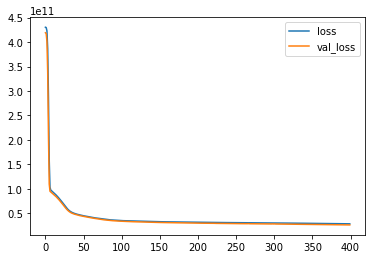

In [114]:
losses.plot()

# Evaluation on Test Data


In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [117]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [118]:
predictions = model.predict(X_test)

In [119]:
mean_absolute_error(y_test,predictions)

99827.33715277778

In [120]:
np.sqrt(mean_squared_error(y_test,predictions))

162511.04402094556

In [124]:
# The best possible scrore is 1.
explained_variance_score(y_test,predictions)

0.8008603600504222

In [122]:
df['price'].mean()

540296.5735055795

In [126]:
df['price'].median()

450000.0

**Visualizing y_test and predictions**

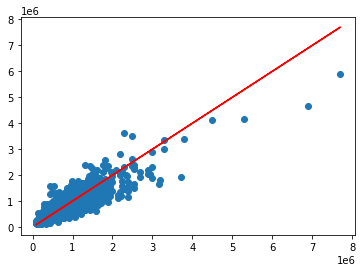

In [125]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [128]:
errors = y_test.reshape(6480, 1) - predictions

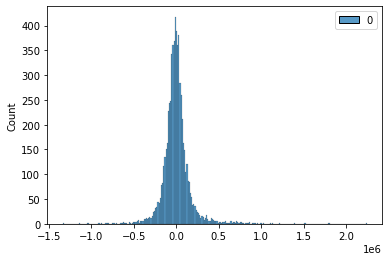

In [130]:
sns.histplot(errors)

-------------
### Predicting on a brand new house

In [131]:
single_house = df.drop('price',axis=1).iloc[0]

In [132]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [133]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [134]:
model.predict(single_house)

array([[284944.28]], dtype=float32)

In [135]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

*Actual price of the new house 221900, model predicted 284944*
*Result shows model is overfitting. Possibly due to presence of more outliers in the dataset that could be dropped to improve model performance. y-test & predictions plot shows the model performs well for prices lower than 2 millions. Therefore result can be improve by retaining the model*